# Proyek Analisis Data: Bike Sharing Dataset (Sumber)
- **Nama:** Agum Medisa
- **Email:** a184ybm526@devacademy.id
- **ID Dicoding:** agummedisa

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?
- Pada jam berapa dan hari apa permintaan sepeda paling tinggi dan rendah?
- Bagaimana tren penyewaan sepeda berdasarkan musim?
- Bagaimana pengaruh hari libur dan akhir pekan terhadap penyewaan sepeda?
- Seberapa besar dampak perubahan suhu terhadap penyewaan sepeda?
- Apakah ada jam sibuk dalam penyewaan sepeda?
- Bagaimana pengaruh cuaca ekstrem terhadap penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
day_df = pd.read_csv("./data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Terdapat variasi dalam kondisi cuaca (kolom weathersit), yang bisa digunakan untuk menganalisis pengaruh cuaca terhadap penggunaan sepeda.
- Kolom temp dan windspeed bisa digunakan untuk memahami pengaruh suhu dan kecepatan angin terhadap aktivitas bersepeda.
- Kolom holiday dan workingday memberi gambaran tentang pengaruh hari libur dan hari kerja terhadap jumlah penggunaan sepeda.


In [4]:
hour_df = pd.read_csv("./data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Penggunaan Sepeda Berfluktuasi Sepanjang Hari:
- Dari beberapa data awal, jumlah cnt berubah setiap jam, dengan variasi pengguna casual dan registered.
- Tren Pengguna Casual vs Registered:
- Di jam-jam awal (misalnya pukul 1-4 pagi), jumlah pengguna registered lebih tinggi dibanding casual.
- Ini menunjukkan bahwa pengguna terdaftar mungkin lebih konsisten dalam penggunaan sepeda, sedangkan pengguna casual cenderung lebih sedikit di malam/malam hari.

### Assessing Data

In [5]:
# Menilai data day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Tidak ada masalah dalam data ```day_df``` ini, jumlah semua data sama

In [6]:
# Menilai Data hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Sama halnya dengan ```day_df```, data pada ```hour_df``` juga tidak ada masalah di dalamnya

In [7]:
# Melihat jumlah duplikasi data day_df
print("Jumlah duplikasi day_df: ", day_df.duplicated().sum())
# Melihat jumlah duplikasi data pada hour_df
print("Jumlah duplikasi hour_df: ", hour_df.duplicated().sum())

Jumlah duplikasi day_df:  0
Jumlah duplikasi hour_df:  0


In [8]:
# Memeriksa parameter statistik dari kolom numerik day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
# Memeriksa parameter statistik dari kolom numerik hour_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Pada proses Assesing Data, dapat dilihat tidak ada yang salah dari data-data yang telah ada. Sehingga tidak perlu lagi untuk masuk ke tahap Cleaning Data

## Exploratory Data Analysis (EDA)

### Explore Data day_df

In [10]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


**Insight:**
- Dataset mencakup 731 hari, yang berarti data mencakup sekitar 2 tahun
- Rata-rata harian: 4504 sepeda digunakan per hari
- Minimum: 22 sepeda dalam satu hari
- Maksimum: 8714 sepeda dalam satu hari

### Explore Data hour_df

In [11]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


**Insight:**
- Rata-rata: 189 sepeda per jam
- Casual (35.7 pengguna/jam) jauh lebih sedikit dibanding Registered (153.8 pengguna/jam)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?

In [12]:
# Statistik penyewaan berdasarkan kondisi cuaca
weather_impact = day_df.groupby("weathersit")["cnt"].describe()
weather_impact.index = weather_impact.index.map({1: "Clear", 2: "Mist", 3: "Light Snow/Rain"})
print(weather_impact)

                 count         mean          std    min     25%     50%  \
weathersit                                                                
Clear            463.0  4876.786177  1879.483989  431.0  3636.5  4844.0   
Mist             247.0  4035.862348  1809.109918  605.0  2674.5  4040.0   
Light Snow/Rain   21.0  1803.285714  1240.284449   22.0   705.0  1817.0   

                    75%     max  
weathersit                       
Clear            6458.5  8714.0  
Mist             5257.5  8362.0  
Light Snow/Rain  2424.0  4639.0  


In [13]:
# Corelasi dengan Suhu, Kelembaban, Kecepatan Angin terhadap Penyewaan
correlation = day_df[["temp", "hum", "windspeed", "cnt"]].corr()
print(correlation)

               temp       hum  windspeed       cnt
temp       1.000000  0.126963  -0.157944  0.627494
hum        0.126963  1.000000  -0.248489 -0.100659
windspeed -0.157944 -0.248489   1.000000 -0.234545
cnt        0.627494 -0.100659  -0.234545  1.000000


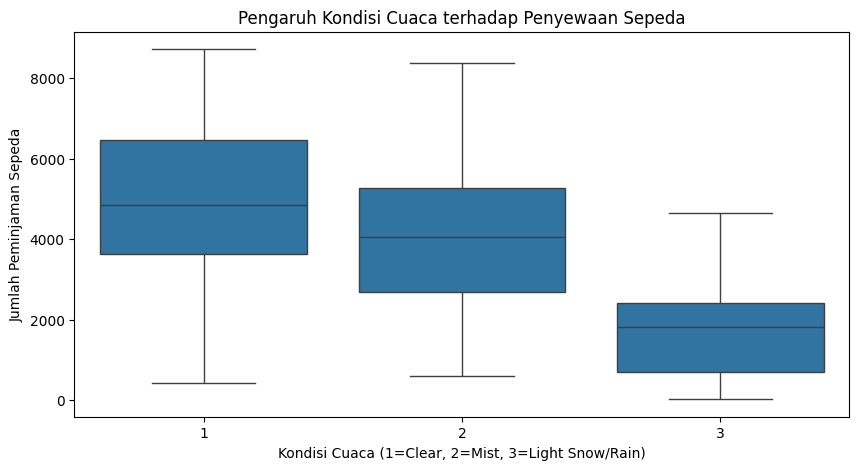

In [14]:
# Plot hubungan antara kondisi cuaca dan jumlah penyewaan
plt.figure(figsize=(10, 5))
sns.boxplot(x="weathersit", y="cnt", data=day_df)
plt.xlabel("Kondisi Cuaca (1=Clear, 2=Mist, 3=Light Snow/Rain)")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.title("Pengaruh Kondisi Cuaca terhadap Penyewaan Sepeda")
plt.show()

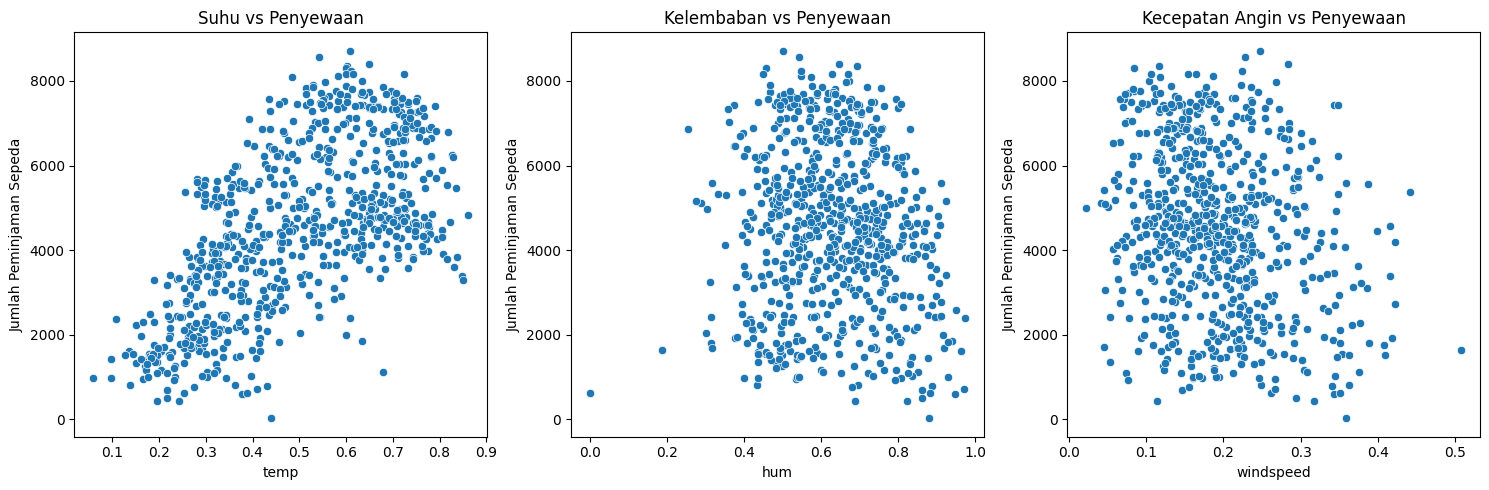

In [15]:
# Scatter plot untuk melihat korelasi suhu, kelembaban, kecepatan angin terhadap jumlah peminjaman
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
features = ["temp", "hum", "windspeed"]
titles = ["Suhu vs Penyewaan", "Kelembaban vs Penyewaan", "Kecepatan Angin vs Penyewaan"]

for i, feature in enumerate(features):
    sns.scatterplot(ax=axes[i], x=day_df[feature], y=day_df["cnt"])
    axes[i].set_title(titles[i])
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Jumlah Peminjaman Sepeda")

plt.tight_layout()
plt.show()

### Pertanyaan 2: Pada jam berapa dan hari apa permintaan sepeda paling tinggi dan rendah?


In [16]:
# Pola Penyewaan Sepeda Berdasarkan Jam
hourly_rentals = hour_df.groupby("hr")["cnt"].mean().reset_index()
print(hourly_rentals)

    hr         cnt
0    0   53.898072
1    1   33.375691
2    2   22.869930
3    3   11.727403
4    4    6.352941
5    5   19.889819
6    6   76.044138
7    7  212.064649
8    8  359.011004
9    9  219.309491
10  10  173.668501
11  11  208.143054
12  12  253.315934
13  13  253.661180
14  14  240.949246
15  15  251.233196
16  16  311.983562
17  17  461.452055
18  18  425.510989
19  19  311.523352
20  20  226.030220
21  21  172.314560
22  22  131.335165
23  23   87.831044


In [17]:
# Pola Penyewaan Sepeda Berdasarkan Hari
daily_rentals = hour_df.groupby("weekday")["cnt"].mean().reset_index()
daily_rentals["weekday"] = daily_rentals["weekday"].replace({
    0: "Minggu", 1: "Senin", 2: "Selasa", 3: "Rabu",
    4: "Kamis", 5: "Jumat", 6: "Sabtu"
})
print(daily_rentals)

  weekday         cnt
0  Minggu  177.468825
1   Senin  183.744655
2  Selasa  191.238891
3    Rabu  191.130505
4   Kamis  196.436665
5   Jumat  196.135907
6   Sabtu  190.209793


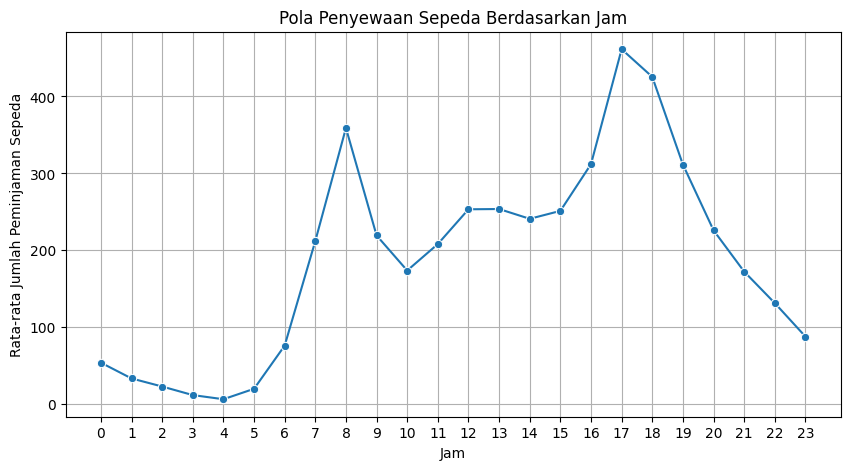

In [18]:
# Agregasi rata-rata penyewaan berdasarkan jam
hourly_rentals = hour_df.groupby("hr")["cnt"].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_rentals.index, y=hourly_rentals.values, marker="o")
plt.xticks(range(0, 24))
plt.xlabel("Jam")
plt.ylabel("Rata-rata Jumlah Peminjaman Sepeda")
plt.title("Pola Penyewaan Sepeda Berdasarkan Jam")
plt.grid()
plt.show()

C:\Users\Agum Medisa\AppData\Local\Temp\ipykernel_11204\290307456.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=daily_rentals.index, y=daily_rentals.values, palette="Blues")


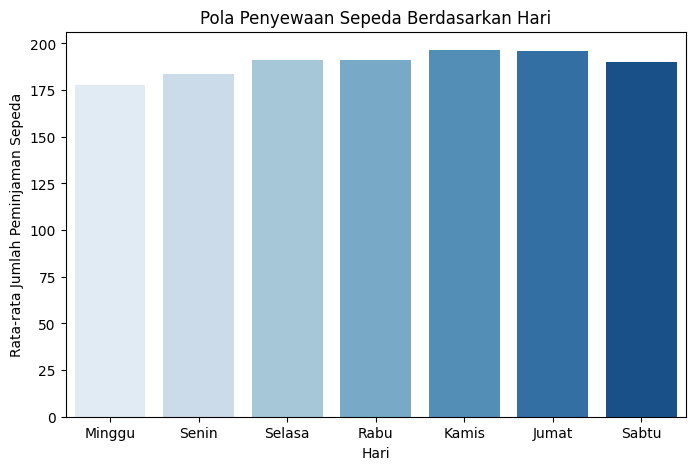

In [19]:
# Agregasi rata-rata penyewaan berdasarkan hari
daily_rentals = hour_df.groupby("weekday")["cnt"].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=daily_rentals.index, y=daily_rentals.values, palette="Blues")
plt.xticks(ticks=range(7), labels=["Minggu", "Senin", "Selasa", "Rabu", "Kamis", "Jumat", "Sabtu"])
plt.xlabel("Hari")
plt.ylabel("Rata-rata Jumlah Peminjaman Sepeda")
plt.title("Pola Penyewaan Sepeda Berdasarkan Hari")
plt.show()

### Pertanyaan 3: Bagaimana tren penyewaan sepeda berdasarkan musim?

In [20]:
# Tren Penyewaan Sepeda Berdasarkan Musim
season_trend = day_df.groupby("season")["cnt"].sum().reset_index()
season_trend["season"] = season_trend["season"].replace({1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"})
print(season_trend)

   season      cnt
0  Spring   471348
1  Summer   918589
2    Fall  1061129
3  Winter   841613


C:\Users\Agum Medisa\AppData\Local\Temp\ipykernel_11204\2935148310.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="season", y="cnt", data=day_df, palette="coolwarm")


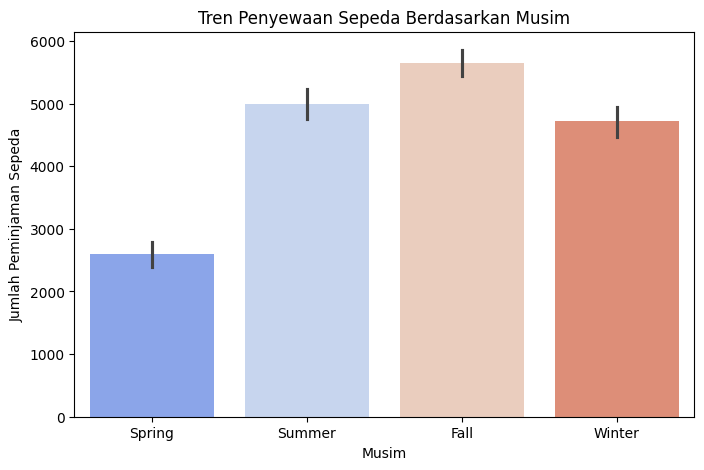

In [21]:
# Tren penyewaan sepeda berdasarkan musim?
plt.figure(figsize=(8, 5))
sns.barplot(x="season", y="cnt", data=day_df, palette="coolwarm")
plt.xticks([0, 1, 2, 3], ["Spring", "Summer", "Fall", "Winter"])
plt.xlabel("Musim")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.title("Tren Penyewaan Sepeda Berdasarkan Musim")
plt.show()

### Pertanyaan 3: Pengaruh Hari Libur dan Akhir Pekan terhadap Penyewaan Sepeda

In [22]:
holiday_workingday = day_df.groupby(["holiday", "workingday"])["cnt"].mean().reset_index()
print(holiday_workingday)

   holiday  workingday          cnt
0        0           0  4389.685714
1        0           1  4584.820000
2        1           0  3735.000000


C:\Users\Agum Medisa\AppData\Local\Temp\ipykernel_11204\1870355905.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(["Bukan Hari Libur", "Hari Libur"])
C:\Users\Agum Medisa\AppData\Local\Temp\ipykernel_11204\1870355905.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(["Akhir Pekan", "Hari Kerja"])


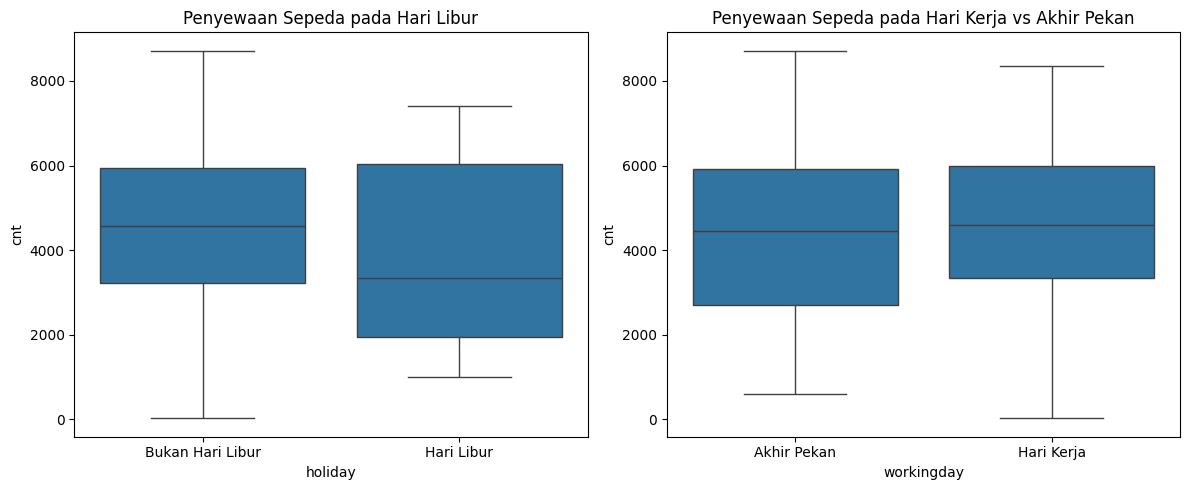

In [23]:
#  Pengaruh hari libur dan akhir pekan terhadap penyewaan sepeda?
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Perbandingan hari libur vs bukan
sns.boxplot(ax=axes[0], x="holiday", y="cnt", data=day_df)
axes[0].set_xticklabels(["Bukan Hari Libur", "Hari Libur"])
axes[0].set_title("Penyewaan Sepeda pada Hari Libur")

# Perbandingan hari kerja vs akhir pekan
sns.boxplot(ax=axes[1], x="workingday", y="cnt", data=day_df)
axes[1].set_xticklabels(["Akhir Pekan", "Hari Kerja"])
axes[1].set_title("Penyewaan Sepeda pada Hari Kerja vs Akhir Pekan")

plt.tight_layout()
plt.show()


### Pertanyaan 4: Dampak Perubahan Suhu terhadap Penyewaan Sepeda

In [24]:
correlation = day_df[["temp", "cnt"]].corr()
print(correlation)

          temp       cnt
temp  1.000000  0.627494
cnt   0.627494  1.000000


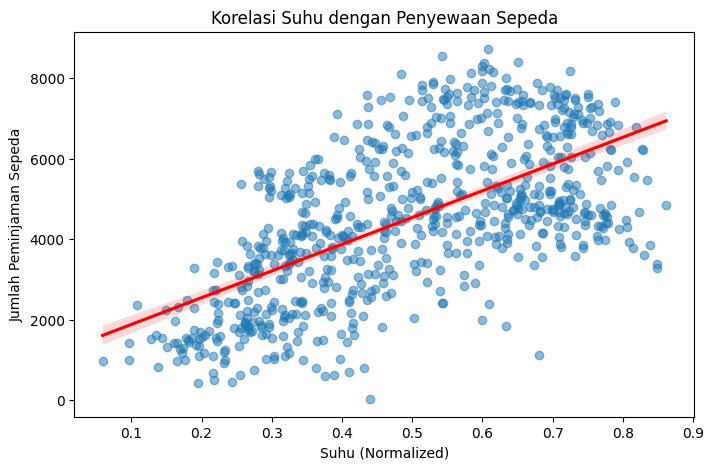

In [25]:
# Dampak perubahan suhu terhadap penyewaan sepeda
plt.figure(figsize=(8, 5))
sns.regplot(x="temp", y="cnt", data=day_df, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.xlabel("Suhu (Normalized)")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.title("Korelasi Suhu dengan Penyewaan Sepeda")
plt.show()

### Pertanyaan 5: Jam Sibuk dalam Penyewaan Sepeda

In [26]:
busy_hours = hour_df.groupby("hr")["cnt"].mean().reset_index()
print(busy_hours)

    hr         cnt
0    0   53.898072
1    1   33.375691
2    2   22.869930
3    3   11.727403
4    4    6.352941
5    5   19.889819
6    6   76.044138
7    7  212.064649
8    8  359.011004
9    9  219.309491
10  10  173.668501
11  11  208.143054
12  12  253.315934
13  13  253.661180
14  14  240.949246
15  15  251.233196
16  16  311.983562
17  17  461.452055
18  18  425.510989
19  19  311.523352
20  20  226.030220
21  21  172.314560
22  22  131.335165
23  23   87.831044


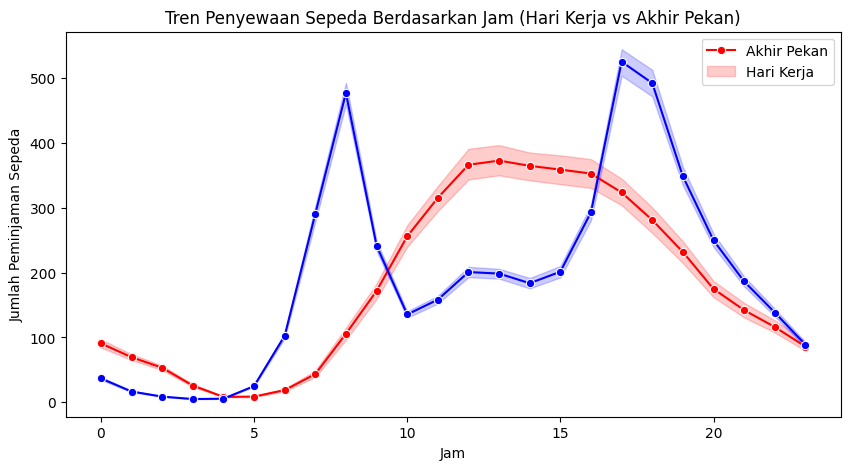

In [27]:
# Jam sibuk dalam penyewaan sepeda
plt.figure(figsize=(10, 5))
sns.lineplot(x="hr", y="cnt", hue="workingday", data=hour_df, marker="o", palette=["red", "blue"])
plt.xlabel("Jam")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.title("Tren Penyewaan Sepeda Berdasarkan Jam (Hari Kerja vs Akhir Pekan)")
plt.legend(["Akhir Pekan", "Hari Kerja"])
plt.show()

### Pertanyaan 6 : Pengaruh Cuaca terhadap Penyewaan Sepeda

In [28]:
weather_impact = day_df.groupby("weathersit")["cnt"].mean().reset_index()
weather_impact["weathersit"] = weather_impact["weathersit"].replace({1: "Clear", 2: "Mist/Cloudy", 3: "Light Snow/Rain", 4: "Heavy Rain/Snow"})
print(weather_impact)

        weathersit          cnt
0            Clear  4876.786177
1      Mist/Cloudy  4035.862348
2  Light Snow/Rain  1803.285714


C:\Users\Agum Medisa\AppData\Local\Temp\ipykernel_11204\143809133.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="weathersit", y="cnt", data=day_df, palette="coolwarm")


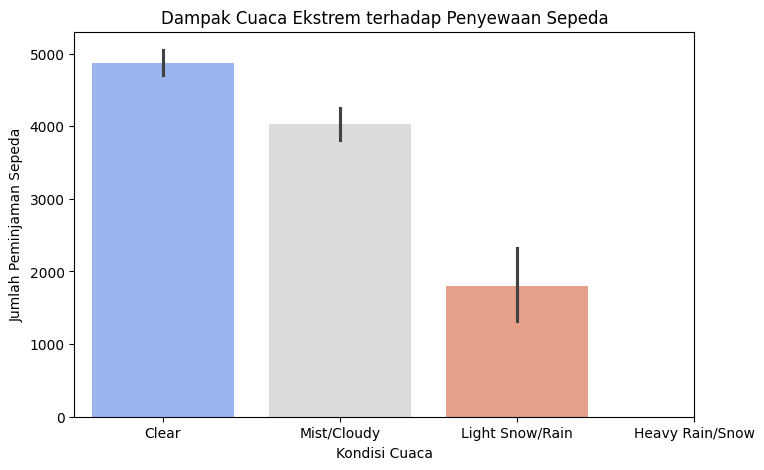

In [29]:
plt.figure(figsize=(8, 5))
sns.barplot(x="weathersit", y="cnt", data=day_df, palette="coolwarm")
plt.xticks([0, 1, 2, 3], ["Clear", "Mist/Cloudy", "Light Snow/Rain", "Heavy Rain/Snow"])
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.title("Dampak Cuaca Ekstrem terhadap Penyewaan Sepeda")
plt.show()

# RFM Analysis

In [31]:
print(day_df.columns)
print(hour_df.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')
Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


### RFM Analysis Berbasis Tipe Pengguna

In [33]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
snapshot_date = day_df["dteday"].max()

rfm_df = pd.DataFrame({
    "Recency": [
        (snapshot_date - day_df[day_df["casual"] > 0]["dteday"].max()).days,  # Recency Casual
        (snapshot_date - day_df[day_df["registered"] > 0]["dteday"].max()).days  # Recency Registered
    ],
    "Frequency": [
        day_df["casual"].count(),  # Frequency Casual
        day_df["registered"].count()  # Frequency Registered
    ],
    "Monetary": [
        day_df["casual"].sum(),  # Monetary Casual
        day_df["registered"].sum()  # Monetary Registered
    ]
}, index=["Casual Users", "Registered Users"])

# Tampilkan hasil RFM
print(rfm_df)


                  Recency  Frequency  Monetary
Casual Users            0        731    620017
Registered Users        0        731   2672662


**Insight:**
- Tidak ada hari kosong tanpa penyewaan sepeda, karena Frequency = 731
- Penyewa registered jauh lebih banyak daripada casual users (2.67 juta vs 620 ribu)
- Recency = 0 menunjukkan bahwa pada hari terakhir data, masih ada aktivitas penyewaan

### RFM Analysis Mingguan

In [34]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
day_df["week"] = day_df["dteday"].dt.isocalendar().week
day_df["year"] = day_df["dteday"].dt.year  # Tambahkan tahun untuk menghindari konflik antar tahun

# Tentukan snapshot date (minggu terakhir dalam dataset)
last_week = day_df["week"].max()
last_year = day_df["year"].max()

# Hitung RFM per minggu
weekly_rfm = day_df.groupby(["year", "week"]).agg(
    Recency=("dteday", lambda x: (day_df["dteday"].max() - x.max()).days),
    Frequency=("week", "count"),
    Monetary=("cnt", "sum")
).reset_index()

# Tampilkan hasil
print(weekly_rfm.sort_values(by=["year", "week"], ascending=False).head(10))

     year  week  Recency  Frequency  Monetary
103  2012    52        1          8     13014
102  2012    51        8          7     26696
101  2012    50       15          7     35966
100  2012    49       22          7     37762
99   2012    48       29          7     35137
98   2012    47       36          7     27315
97   2012    46       43          7     37299
96   2012    45       50          7     40675
95   2012    44       57          7     28762
94   2012    43       64          7     49331


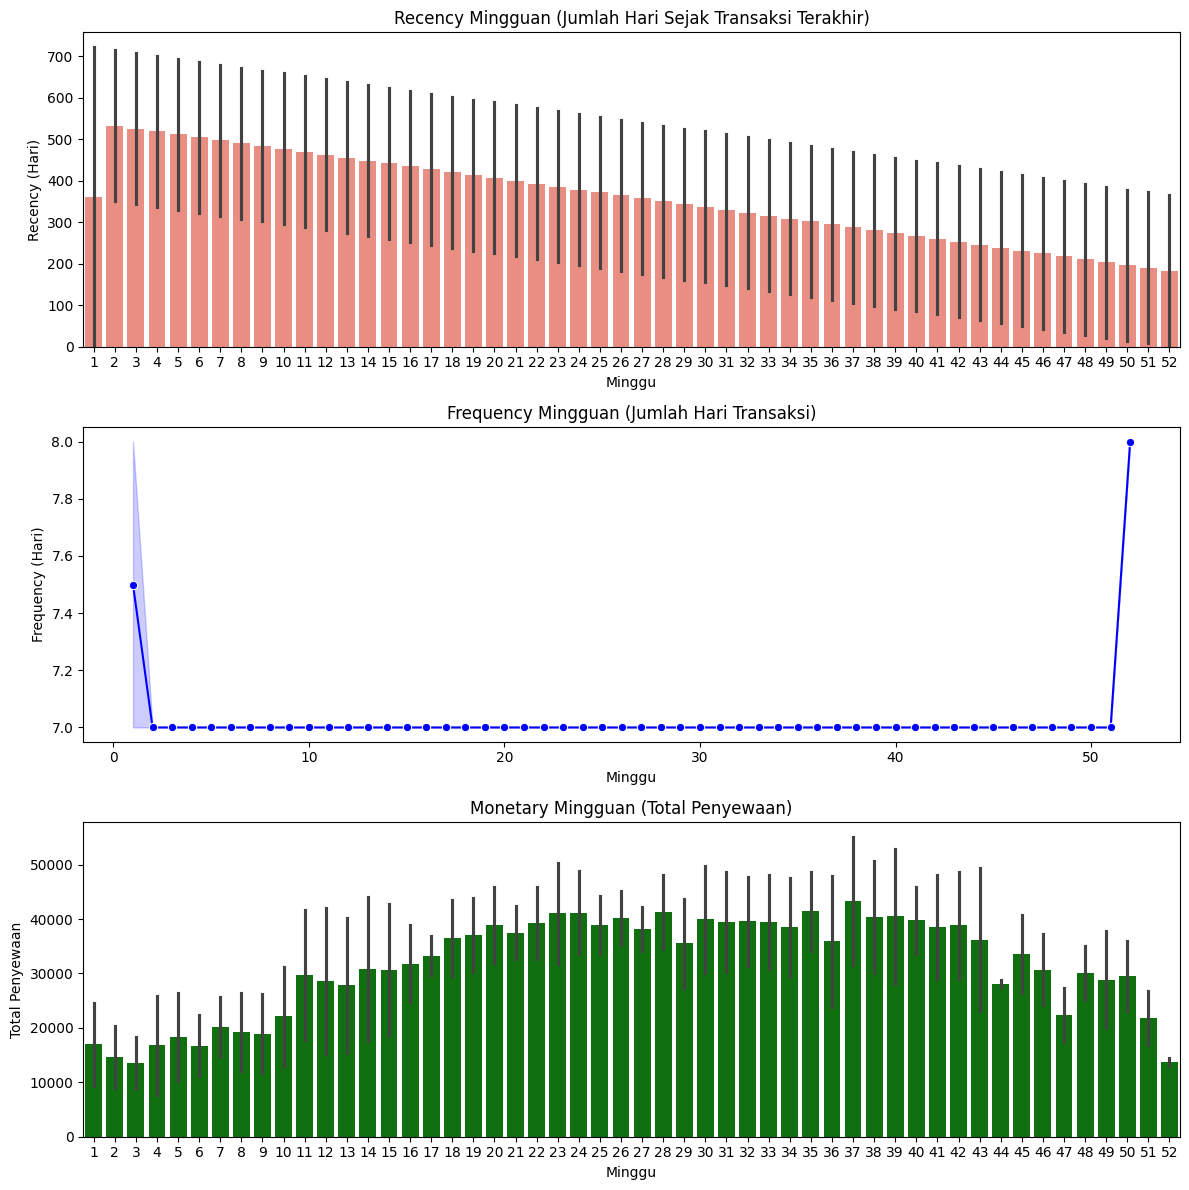

In [36]:
# Konversi tanggal ke format datetime
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
day_df["week"] = day_df["dteday"].dt.isocalendar().week
day_df["year"] = day_df["dteday"].dt.year

# Menentukan minggu terakhir dalam dataset
last_date = day_df["dteday"].max()

# Menghitung RFM Mingguan
weekly_rfm = day_df.groupby(["year", "week"]).agg(
    Recency=("dteday", lambda x: (last_date - x.max()).days),
    Frequency=("dteday", "count"),
    Monetary=("cnt", "sum")
).reset_index()

# Urutkan berdasarkan minggu terbaru
weekly_rfm = weekly_rfm.sort_values(by=["year", "week"], ascending=[True, True])

# Plot
fig, ax = plt.subplots(3, 1, figsize=(12, 12))

# Recency Bar Plot
sns.barplot(x=weekly_rfm["week"], y=weekly_rfm["Recency"], ax=ax[0], color="salmon")
ax[0].set_title("Recency Mingguan (Jumlah Hari Sejak Transaksi Terakhir)")
ax[0].set_xlabel("Minggu")
ax[0].set_ylabel("Recency (Hari)")

# Frequency Line Plot
sns.lineplot(x=weekly_rfm["week"], y=weekly_rfm["Frequency"], ax=ax[1], marker="o", color="blue")
ax[1].set_title("Frequency Mingguan (Jumlah Hari Transaksi)")
ax[1].set_xlabel("Minggu")
ax[1].set_ylabel("Frequency (Hari)")

# Monetary Bar Plot
sns.barplot(x=weekly_rfm["week"], y=weekly_rfm["Monetary"], ax=ax[2], color="green")
ax[2].set_title("Monetary Mingguan (Total Penyewaan)")
ax[2].set_xlabel("Minggu")
ax[2].set_ylabel("Total Penyewaan")

plt.tight_layout()
plt.show()


**Insight:**
- Minggu terakhir memiliki Recency rendah (1 hari), artinya masih aktif
- Frekuensi tetap 7 hari per minggu, kecuali minggu terakhir
- Monetary menunjukkan jumlah transaksi penyewaan per minggu

In [35]:
seasonal_rfm = day_df.groupby("season").agg(
    Recency=("dteday", lambda x: (day_df["dteday"].max() - x.max()).days),
    Frequency=("season", "count"),
    Monetary=("cnt", "sum")
).reset_index()

# Ubah angka season menjadi label
season_map = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
seasonal_rfm["season"] = seasonal_rfm["season"].map(season_map)

# Tampilkan hasil
print(seasonal_rfm)

   season  Recency  Frequency  Monetary
0  Spring        0        181    471348
1  Summer      194        184    918589
2    Fall      100        188   1061129
3  Winter       11        178    841613


C:\Users\Agum Medisa\AppData\Local\Temp\ipykernel_11204\553665608.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_rfm["season"], y=season_rfm["Recency"], ax=ax[0], palette="Reds")
C:\Users\Agum Medisa\AppData\Local\Temp\ipykernel_11204\553665608.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_rfm["season"], y=season_rfm["Frequency"], ax=ax[1], palette="Blues")
C:\Users\Agum Medisa\AppData\Local\Temp\ipykernel_11204\553665608.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_rfm["season"], y=season_rfm[

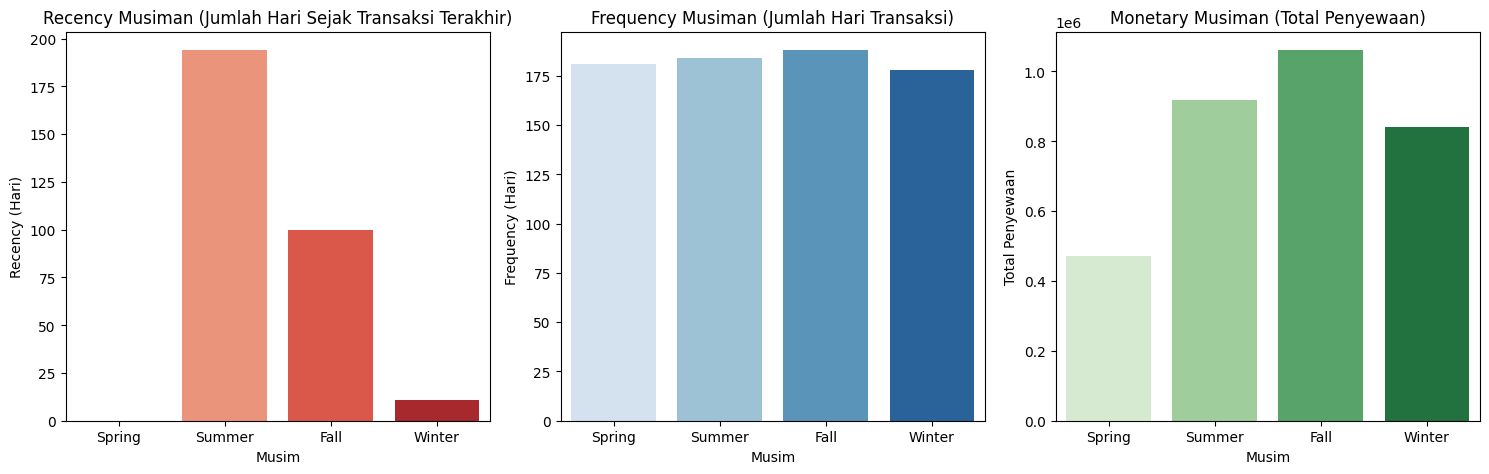

In [37]:
# Menghitung Recency berdasarkan musim terakhir
season_rfm = day_df.groupby("season").agg(
    Recency=("dteday", lambda x: (last_date - x.max()).days),
    Frequency=("dteday", "count"),
    Monetary=("cnt", "sum")
).reset_index()

# Ubah angka season menjadi label
season_map = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
season_rfm["season"] = season_rfm["season"].map(season_map)

# Plot
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Recency Bar Plot
sns.barplot(x=season_rfm["season"], y=season_rfm["Recency"], ax=ax[0], palette="Reds")
ax[0].set_title("Recency Musiman (Jumlah Hari Sejak Transaksi Terakhir)")
ax[0].set_xlabel("Musim")
ax[0].set_ylabel("Recency (Hari)")

# Frequency Bar Plot
sns.barplot(x=season_rfm["season"], y=season_rfm["Frequency"], ax=ax[1], palette="Blues")
ax[1].set_title("Frequency Musiman (Jumlah Hari Transaksi)")
ax[1].set_xlabel("Musim")
ax[1].set_ylabel("Frequency (Hari)")

# Monetary Bar Plot
sns.barplot(x=season_rfm["season"], y=season_rfm["Monetary"], ax=ax[2], palette="Greens")
ax[2].set_title("Monetary Musiman (Total Penyewaan)")
ax[2].set_xlabel("Musim")
ax[2].set_ylabel("Total Penyewaan")

plt.tight_layout()
plt.show()


**Insight:**
- Fall memiliki Monetary tertinggi, menunjukkan puncak aktivitas penyewaan
- Summer dan Spring juga memiliki jumlah transaksi tinggi
- Winter memiliki Recency rendah (11 hari)